# Domácí úkol č. 1 - 🕵️‍♀️ Explorační analýza dat

## 📚 Data
V souborech `intakes.csv` a `outcomes.csv` naleznete data z útulku ve městě Austin, Texas USA. Data pocházejí z oficiálního [zdroje otevřených dat města Austin](https://data.austintexas.gov/).

Dataset [intakes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) obsahuje data o přijatých zvířatech od 1. 10. 2013 do 27. 4 2022. Dataset [outcomes](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) obsahuje údaje o zvířatech, která útulek opustila (např. byla adoptována, vrácena majiteli a podobně) za tentýž časový interval. Může se stát, že zvířata přijatá do 1. 10. 2013 se nevyskytují v `intakes.csv` (data se ještě neshromažďovala), ale budou mít záznam v `outcomes.csv`, pokud útulek po tomto datu opustila.

☝️ Každý dataset může **stejné zvíře obsahovat víckrát** (1. některá zvířata se do útulku vracela - to je trochu komplikace, pokud byste datasety chtěli spojit - pro řešení úkolu spojování ale není nutné, 2. některé záznamy jsou duplicitní - ty můžete odstranit, jedná se o chybu). 

## Zadání
> ☝️ Používejte markdown buňky! Zdůvodňujte všechny důležité kroky, popisujte vizualizace a co je z nich možné pozorovat. Za nepřehledný domácí úkol nebudou uděleny body.

Za řádné průběžné komentování a vizuální prezentaci postupu a výsledků lze získat až 3 body.

**✨ Příprava dat** (celkem 4 body)
* Importujte potřebné balíčky.
* Načtěte si datasety intakes a outcomes z příslušných csv souborů.
* Seznamte se s oběma datasety a svá zjištění komentujte:
  * Příklad informací, které lze zjistit: počet řádků datasetu, počet a význam příznaků, datový typ příznaků a počet jejich unikátních hodnot, ...
* Vyčistěte a zkonvertujte data:
  * Zjistěte jakým způsobem jsou v datasetu uváděny chybějící hodnoty a v případě potřeby je přepište na NaN.
  * Zkonvertujte kategorické příznaky na typ category.
  * Převeďte příznak Age upon Intake/Outcome na numerický příznak.
  * Převeďte příznak DateTime na typ datetime64.
  * Proveďte všechny další úpravy, které vám dávají smysl (konverze dalších příznaků, odstranění duplicitních údajů, přidání nových příznaků, ...).
  
**🖊️ Deskriptivní statistiky** (celkem 6 bodů)

Volbu vhodných statistik pro daný typ dat komentujte a pokud je to možné, využívejte co nejvíce vizualizace.
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohla být korelace (dvojice typu Age upon Intake a Age upon Outcome neuznáváme) a popište jejich vztah pomocí bivariačních deskriptivních statistik.

**❓ Zadané otázky** (2 body za každou otázku, celkem max. 6 bodů)

Pomocí vhodných vizualizací odpovídejte na následující otázky:
* Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
* Hraje věk zvířete roli při adopci?
* Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?

K jedné otázce můžete v případě potřeby vytvořit více vizualizací. Výsledek vizualizace a všechny mezikroky komentujte.

**❓ Vlastní otázky** (2 body za každou otázku, celkem max. 6 bodů)

Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech. Také je možné využít třetí dataset [locations](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Found-Pets-Map/hye6-gvq2), který naleznete v souboru locations.csv, nebo si můžete stáhnout nějaká další zajímavá data, která souvisí s tímto tématem.

Dataset locations poskytuje informace o všech toulavých kočkách a psech, které jsou v databázi útulku **méně než týden**. Většina se nachází v útulku, ale část z nich je u dobrovolníků – tato informace je uvedena ve sloupci At AAC (AAC – Austin Animal Center).

### Bodové hodnocení
Shrnutí bodů, které můžete nejvýše získat:
- 3 body za komentáře a vizuální prezentaci postupu a výsledků,
- 4 body za přípravu dat,
- 6 bodů za deskriptivní statistiku,
- 6 bodů za zodpovězení všech zadaných otázek,
- 6 bodů za definici a zodpovězení minimálně tří vlastních otázek.

Celkem lze za domácí úkol č. 1 získat maximálně 25 bodů.

# Příprava dat
### Načtení dat
Standartně si načteme data pomocí `pandas` knihovny.

In [194]:
import pandas as pd
import numpy as np
intakes = pd.read_csv("intakes.csv")
outcomes = pd.read_csv("outcomes.csv")
locations = pd.read_csv("locations.csv")


### Explorace dat
Koukneme se na naše sloupce.


In [195]:
print(list(intakes.columns))
print(list(outcomes.columns))
print(list(locations.columns))

['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Found Location', 'Intake Type', 'Intake Condition', 'Animal Type', 'Sex upon Intake', 'Age upon Intake', 'Breed', 'Color']
['Animal ID', 'Name', 'DateTime', 'MonthYear', 'Date of Birth', 'Outcome Type', 'Outcome Subtype', 'Animal Type', 'Sex upon Outcome', 'Age upon Outcome', 'Breed', 'Color']
['Animal ID', 'Found Location', 'At AAC', 'Intake Date', 'Type', 'Looks Like', 'Color', 'Sex', 'Age', 'Image Link']


Vypadá to, že některé sloupce jsou stejného typu, pojďme se na to ještě podívat vypsáním prvních pár sloupců.

In [196]:
intakes.head(3)

Animal ID     Name                DateTime     MonthYear  \
0   A786884   *Brock  01/03/2019 04:19:00 PM  January 2019   
1   A706918    Belle  07/05/2015 12:59:00 PM     July 2015   
2   A724273  Runster  04/14/2016 06:43:00 PM    April 2016   

                        Found Location Intake Type Intake Condition  \
0  2501 Magin Meadow Dr in Austin (TX)       Stray           Normal   
1     9409 Bluegrass Dr in Austin (TX)       Stray           Normal   
2   2818 Palomino Trail in Austin (TX)       Stray           Normal   

  Animal Type Sex upon Intake Age upon Intake                     Breed  \
0         Dog   Neutered Male         2 years                Beagle Mix   
1         Dog   Spayed Female         8 years  English Springer Spaniel   
2         Dog     Intact Male       11 months               Basenji Mix   

         Color  
0     Tricolor  
1  White/Liver  
2  Sable/White

In [197]:
outcomes.head(3)

Animal ID   Name                DateTime MonthYear Date of Birth  \
0   A794011  Chunk  05/08/2019 06:20:00 PM  May 2019    05/02/2017   
1   A776359  Gizmo  07/18/2018 04:02:00 PM  Jul 2018    07/12/2017   
2   A821648    NaN  08/16/2020 11:38:00 AM  Aug 2020    08/16/2019   

  Outcome Type Outcome Subtype Animal Type Sex upon Outcome Age upon Outcome  \
0    Rto-Adopt             NaN         Cat    Neutered Male          2 years   
1     Adoption             NaN         Dog    Neutered Male           1 year   
2   Euthanasia             NaN       Other          Unknown           1 year   

                     Breed              Color  
0   Domestic Shorthair Mix  Brown Tabby/White  
1  Chihuahua Shorthair Mix        White/Brown  
2                  Raccoon               Gray

In [198]:
locations.head(3)

Animal ID                                     Found Location  \
0   A855691  811 BURNSALL GATES DR78660\n(30.417121, -97.64...   
1   A855620  8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...   
2   A855431  1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...   

                       At AAC Intake Date Type          Looks Like  \
0   Yes (come to the shelter)  04/22/2022  Dog        Pit Bull Mix   
1   Yes (come to the shelter)  04/20/2022  Dog   Cairn Terrier Mix   
2  No (contact for more info)  04/18/2022  Cat  Domestic Shorthair   

         Color          Sex       Age  \
0   Gray/White  Intact Male   2 years   
1          Tan  Intact Male  3 months   
2  Black/White  Intact Male   4 weeks   

                                          Image Link  
0  http://www.petharbor.com/pet.asp?uaid=ASTN.A85...  
1  http://www.petharbor.com/pet.asp?uaid=ASTN.A85...  
2  http://www.petharbor.com/pet.asp?uaid=ASTN.A85...

In [199]:
intakes.info()
outcomes.info()
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138585 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         138585 non-null  object
 1   Name              97316 non-null   object
 2   DateTime          138585 non-null  object
 3   MonthYear         138585 non-null  object
 4   Found Location    138585 non-null  object
 5   Intake Type       138585 non-null  object
 6   Intake Condition  138585 non-null  object
 7   Animal Type       138585 non-null  object
 8   Sex upon Intake   138584 non-null  object
 9   Age upon Intake   138585 non-null  object
 10  Breed             138585 non-null  object
 11  Color             138585 non-null  object
dtypes: object(12)
memory usage: 12.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138769 entries, 0 to 138768
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------

## Manipulace s daty
Prvním problémem bude se sloupci `Age upon Intake`, `Age upon Outcome` a `Age`.

In [200]:
print(intakes["Age upon Intake"].unique())
print(outcomes["Age upon Outcome"].unique())
print(locations["Age"].unique())

['2 years' '8 years' '11 months' '4 weeks' '4 years' '6 years' '6 months'
 '5 months' '14 years' '1 month' '2 months' '18 years' '9 years'
 '4 months' '1 year' '3 years' '4 days' '1 day' '5 years' '2 weeks'
 '15 years' '7 years' '3 weeks' '3 months' '12 years' '1 week' '9 months'
 '10 years' '10 months' '7 months' '8 months' '1 weeks' '5 days' '0 years'
 '2 days' '11 years' '17 years' '3 days' '13 years' '5 weeks' '19 years'
 '6 days' '16 years' '20 years' '-1 years' '22 years' '23 years'
 '-2 years' '21 years' '-3 years' '25 years' '24 years' '30 years'
 '28 years']
['2 years' '1 year' '4 months' '6 days' '7 years' '2 months' '2 days'
 '3 weeks' '9 months' '4 weeks' '2 weeks' '3 months' '9 years' '10 years'
 '6 months' '8 years' '3 years' '7 months' '6 years' '4 years' '1 month'
 '12 years' '5 years' '1 weeks' '5 months' '5 days' '15 years' '11 months'
 '10 months' '4 days' '16 years' '1 day' '8 months' '11 years' '13 years'
 '1 week' '14 years' '3 days' '0 years' '5 weeks' '17 years'

Je vidět, že můžeme tyto sloupce převést na numerický typ, všimněme si ale negativních hodnot v některých z hodnot, s tím se vypořádáme později.

Koukneme se jestli se v nich nevyskytují nulové hodnoty.

In [201]:
print(len(intakes[intakes["Age upon Intake"].isnull()]))
print(len(outcomes[outcomes["Age upon Outcome"].isnull()]))
print(len(locations[locations["Age"].isnull()]))

0
5
0


Nulových hodnot se zbavíme. (Pouze dataframe `outcomes` obsahuje nulové hodnoty v sloupci `Age upon Outcome`)

In [202]:
outcomes = outcomes[~outcomes["Age upon Outcome"].isnull()]

Převedeme věky na numerické hodnoty.

In [203]:
def convert_age_upon_outcome(s):
    if s == np.nan:
        print("end me")
    if not isinstance(s, str):
        return np.nan # cell value is not filled, is equivalent to 0 float
    n, day_month_year = s.split(" ")[:2]
    n = int(n)
    # if includes "year" in the start, in other words if its "year" or "years". PS: (second slice index may and can be bigger than the string length)
    if "year" == day_month_year[:len("year")] :
        return n * 365
    elif "month" == day_month_year[:len("month")]:
        return n * 30
    elif "week" == day_month_year[:len("week")]:
        return n * 7
    else: #if "day" == day_month_year[:len("day")]:
        return n

intakes["Age upon Intake"] = intakes["Age upon Intake"].apply(convert_age_upon_outcome)
outcomes["Age upon Outcome"] = outcomes["Age upon Outcome"].apply(convert_age_upon_outcome)
locations["Age"] = locations["Age"].apply(convert_age_upon_outcome)


print(intakes["Age upon Intake"].dtype, outcomes["Age upon Outcome"].dtype, locations["Age"].dtype)
locations.head(3)


int64 int64 int64


Animal ID                                     Found Location  \
0   A855691  811 BURNSALL GATES DR78660\n(30.417121, -97.64...   
1   A855620  8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...   
2   A855431  1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...   

                       At AAC Intake Date Type          Looks Like  \
0   Yes (come to the shelter)  04/22/2022  Dog        Pit Bull Mix   
1   Yes (come to the shelter)  04/20/2022  Dog   Cairn Terrier Mix   
2  No (contact for more info)  04/18/2022  Cat  Domestic Shorthair   

         Color          Sex  Age  \
0   Gray/White  Intact Male  730   
1          Tan  Intact Male   90   
2  Black/White  Intact Male   28   

                                          Image Link  
0  http://www.petharbor.com/pet.asp?uaid=ASTN.A85...  
1  http://www.petharbor.com/pet.asp?uaid=ASTN.A85...  
2  http://www.petharbor.com/pet.asp?uaid=ASTN.A85...

Jak jsme si řekli, negativní hodnoty jsme pořád nevyřešili, podíváme se na problematické datasety.

In [204]:
print(len(intakes.loc[intakes["Age upon Intake"] < 0] ))
print(len(outcomes.loc[outcomes["Age upon Outcome"] < 0] ))
print(len(locations.loc[locations["Age"] < 0] ))

8
8
0


Smazeme řádky s negativními hodnoty převedených sloupců. (**locations** je vpořádku)

In [205]:
intakes = intakes[intakes["Age upon Intake"] >= 0]
outcomes = outcomes[outcomes["Age upon Outcome"] >= 0]
print(len(intakes.loc[intakes["Age upon Intake"] < 0] ))
print(len(outcomes.loc[outcomes["Age upon Outcome"] < 0] ))

0
0


Změníme hodnoty času na `dtype` `datetime64`. Využijeme `format` parametru pro urychlení výpočtu.

In [206]:
# convert date to datetime64[ns]
# use "format" to gain 10x conversion speeds
intakes['DateTime'] = pd.to_datetime(intakes['DateTime'], format="%m/%d/%Y %I:%M:%S %p")
outcomes['DateTime'] = pd.to_datetime(outcomes['DateTime'], format="%m/%d/%Y %I:%M:%S %p")
outcomes['Date of Birth'] = pd.to_datetime(outcomes['Date of Birth'], format="%m/%d/%Y")
locations['Intake Date'] = pd.to_datetime(locations['Intake Date'], format="%m/%d/%Y")

intakes.info()
intakes.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138577 entries, 0 to 138584
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Animal ID         138577 non-null  object        
 1   Name              97308 non-null   object        
 2   DateTime          138577 non-null  datetime64[ns]
 3   MonthYear         138577 non-null  object        
 4   Found Location    138577 non-null  object        
 5   Intake Type       138577 non-null  object        
 6   Intake Condition  138577 non-null  object        
 7   Animal Type       138577 non-null  object        
 8   Sex upon Intake   138576 non-null  object        
 9   Age upon Intake   138577 non-null  int64         
 10  Breed             138577 non-null  object        
 11  Color             138577 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 13.7+ MB


Animal ID     Name            DateTime     MonthYear  \
0   A786884   *Brock 2019-01-03 16:19:00  January 2019   
1   A706918    Belle 2015-07-05 12:59:00     July 2015   
2   A724273  Runster 2016-04-14 18:43:00    April 2016   
3   A665644      NaN 2013-10-21 07:59:00  October 2013   
4   A682524      Rio 2014-06-29 10:38:00     June 2014   

                        Found Location Intake Type Intake Condition  \
0  2501 Magin Meadow Dr in Austin (TX)       Stray           Normal   
1     9409 Bluegrass Dr in Austin (TX)       Stray           Normal   
2   2818 Palomino Trail in Austin (TX)       Stray           Normal   
3                          Austin (TX)       Stray             Sick   
4        800 Grove Blvd in Austin (TX)       Stray           Normal   

  Animal Type Sex upon Intake  Age upon Intake  \
0         Dog   Neutered Male              730   
1         Dog   Spayed Female             2920   
2         Dog     Intact Male              330   
3         Cat   Intact Female               28   
4         Dog   Neutered Male             1460   

                                   Breed        Color  
0                             Beagle Mix     Tricolor  
1               English Springer Spaniel  White/Liver  
2                            Basenji Mix  Sable/White  
3                 Domestic Shorthair Mix       Calico  
4  Doberman Pinsch/Australian Cattle Dog     Tan/Gray

Vyhodíme nadbytečné sloupce.

In [207]:
intakes.drop("MonthYear", axis=1, inplace=True)
outcomes.drop("MonthYear", axis=1, inplace=True)
locations.drop("Image Link", axis=1, inplace=True) # image links don't even work

In [208]:
outcomes.head(5)

Animal ID   Name            DateTime Date of Birth Outcome Type  \
0   A794011  Chunk 2019-05-08 18:20:00    2017-05-02    Rto-Adopt   
1   A776359  Gizmo 2018-07-18 16:02:00    2017-07-12     Adoption   
2   A821648    NaN 2020-08-16 11:38:00    2019-08-16   Euthanasia   
3   A720371  Moose 2016-02-13 17:59:00    2015-10-08     Adoption   
4   A674754    NaN 2014-03-18 11:47:00    2014-03-12     Transfer   

  Outcome Subtype Animal Type Sex upon Outcome  Age upon Outcome  \
0             NaN         Cat    Neutered Male               730   
1             NaN         Dog    Neutered Male               365   
2             NaN       Other          Unknown               365   
3             NaN         Dog    Neutered Male               120   
4         Partner         Cat      Intact Male                 6   

                                Breed              Color  
0              Domestic Shorthair Mix  Brown Tabby/White  
1             Chihuahua Shorthair Mix        White/Brown  
2                             Raccoon               Gray  
3  Anatol Shepherd/Labrador Retriever               Buff  
4              Domestic Shorthair Mix       Orange Tabby

Nastavíme vhodné sloupce na `category` typ.

In [209]:
intakes['Intake Type']      = intakes['Intake Type'].astype('category')
intakes['Intake Condition'] = intakes['Intake Condition'].astype('category')
intakes['Animal Type']      = intakes['Animal Type'].astype('category')
intakes['Sex upon Intake']  = intakes['Sex upon Intake'].astype('category')
intakes['Breed']            = intakes['Breed'].astype('category')
intakes['Color']            = intakes['Color'].astype('category')
intakes['Found Location']      = intakes['Found Location'].astype('category')

outcomes['Outcome Type']     = outcomes['Outcome Type'].astype('category')
outcomes['Outcome Subtype']  = outcomes['Outcome Subtype'].astype('category')
outcomes['Animal Type']      = outcomes['Animal Type'].astype('category')
outcomes['Sex upon Outcome'] = outcomes['Sex upon Outcome'].astype('category')
outcomes['Breed']            = outcomes['Breed'].astype('category')
outcomes['Color']            = outcomes['Color'].astype('category')

locations['At AAC']      = locations['At AAC'].astype('category')
locations['Type'] = locations['Type'].astype('category')
locations['Looks Like']      = locations['Looks Like'].astype('category')
locations['Color']  = locations['Color'].astype('category')
locations['Sex']            = locations['Sex'].astype('category')


Kontrola

In [210]:
print("-"*14 +"Intakes"+ "-"*14 + "\n", intakes.dtypes, sep="")
print("-"*13 +"Outcomes"+ "-"*14 + "\n", outcomes.dtypes, sep="")
print("-"*12 +"Locations"+ "-"*12 + "\n", locations.dtypes, sep="")

--------------Intakes--------------
Animal ID                   object
Name                        object
DateTime            datetime64[ns]
Found Location            category
Intake Type               category
Intake Condition          category
Animal Type               category
Sex upon Intake           category
Age upon Intake              int64
Breed                     category
Color                     category
dtype: object
-------------Outcomes--------------
Animal ID                   object
Name                        object
DateTime            datetime64[ns]
Date of Birth       datetime64[ns]
Outcome Type              category
Outcome Subtype           category
Animal Type               category
Sex upon Outcome          category
Age upon Outcome             int64
Breed                     category
Color                     category
dtype: object
------------Locations------------
Animal ID                 object
Found Location            object
At AAC                  catego

# Deskriptivní statistiky

Zadání:
* Popište příznaky Age upon Intake a DateTime (původně z datasetu intakes) pomocí univariačních deskriptivních statistik.
* Vyberte si tři další příznaky a popište je pomocí univariačních deskriptivních statistik, které jsou pro ně vhodné.
* Vyberte si dva příznaky, mezi kterými by mohl být nějaký vztah (např. korelace) a popište tento vztah pomocí bivariačních deskriptivních statistik. Dvojice typu Age upon Intake a Age upon Outcome neuznáváme. A popište jejich vztah pomocí bivariačních deskriptivních statistik.

## Popsání "Age upon Intake a Date Time
Na toto využijeme dataset `intakes`.

### Otázka č.1 (a): **Age upon Intake**
Zjistíme jaká variace, horní dolní kvartil a medián.

In [211]:
print("0.25 Quantile: {:.2f} year(s)".format(intakes["Age upon Intake"].quantile(0.25)/365))
print("0.50 Quantile: {:.2f} year(s)".format(intakes["Age upon Intake"].median()/365))
print("0.75 Quantile: {:.2f} year(s)".format(intakes["Age upon Intake"].quantile(0.75)/365))
print("Variation: {:.0f}".format((intakes["Age upon Intake"]/365).var()))

0.25 Quantile: 0.16 year(s)
0.50 Quantile: 1.00 year(s)
0.75 Quantile: 2.00 year(s)
Variation: 8


Zobrazíme si vývoj kvantilu od 0% do 100%.

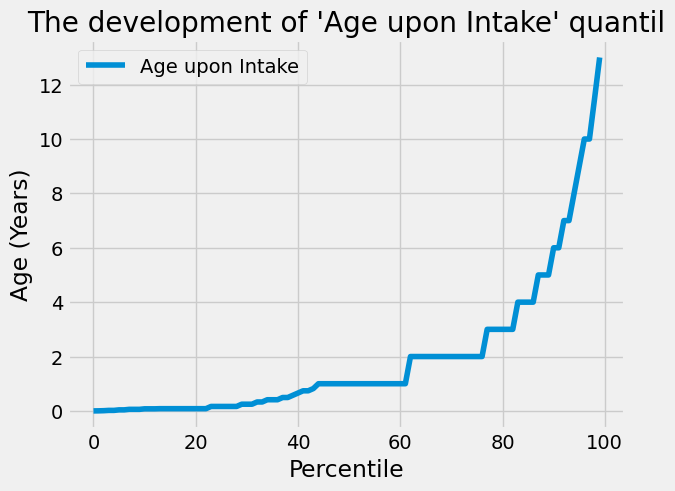

In [212]:
from matplotlib import pyplot as plt

# graph with discrete values 
graininess = 1
x = [i * graininess for i in range(int(100/graininess))] 
quantiles = [intakes["Age upon Intake"].quantile(x*graininess/100)/365 for x in range(int(100/graininess) )] 

plt.style.use("fivethirtyeight")

plt.xlabel("Percentile")
plt.ylabel("Age (Years)")
plt.title("The development of 'Age upon Intake' quantil")

plt.plot(x, quantiles, label="Age upon Intake")
plt.legend()
plt.show()

Je vidět, že mladší zvířata jsou častěji přijatá.

### Otázka č.1 (b): **Date Time**

Zobrazímese četnost, jak často a v jakých hodinách byla zvířata přijata. Proto potřebujeme dataset `intakes` seskupit podle hodiny v  `DateTime` sloupci.`sea

Pro hezčí *bar plot* využijeme knihovnu `seaborn`

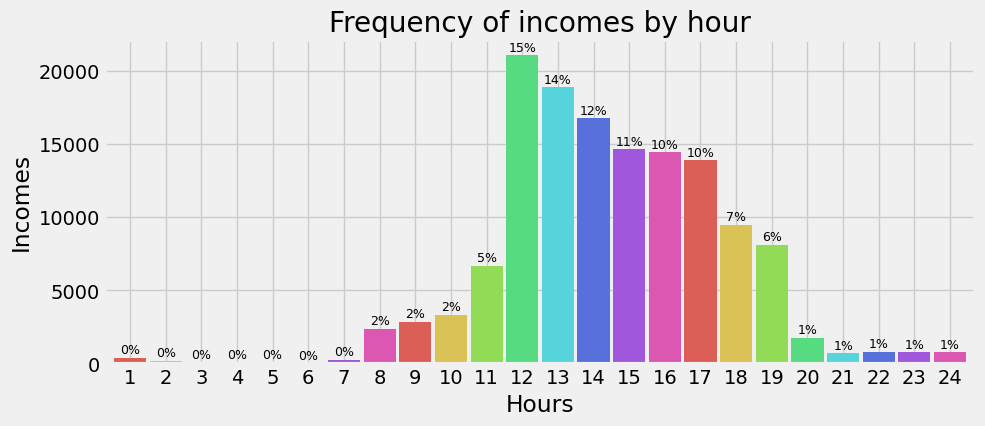

In [213]:
import seaborn as sns
fig = plt.figure(figsize = (10, 4))

# Group data
date_count = intakes["DateTime"].groupby(intakes["DateTime"].dt.hour).count()

# Start index from 1 instead of 0
date_count.index += 1

ax = date_count.plot(kind="bar", color = sns.color_palette("hls", 8), rot=0, width=0.9)
plt.title("Frequency of incomes by hour")
ax.set_xlabel('Hours')
ax.set_ylabel('Incomes')

# Anotate each bar with percentage
total_sum = sum(date_count)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/total_sum:.0%}', (x + width/2, y + height), ha='center', fontsize=9, xytext=(0, 3),textcoords='offset points')

plt.show()

## Výběr dalších 3 příznaků
### Otázka č.2 (a): **Animal Type**

Vybereme top 3 zvířecí typy v `intakes` excel sheetu pomocí koláčového grafu. Vytváříme graf pouze pro 3 kategorické hodnoty abychom udělali graf přehlednější.

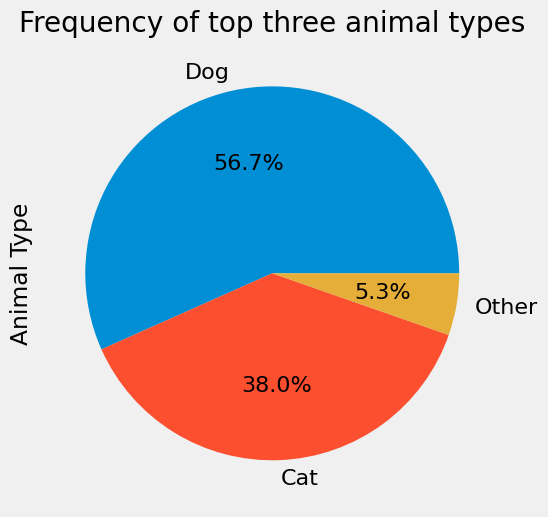

In [214]:
fig = plt.figure(figsize = (5.77, 5.77))
 

#plots = sns.countplot(x="Animal Type", data=intakes, order=["Dog", "Cat", "Other", "Bird", "Livestock"])
animal_counts = intakes["Animal Type"].value_counts()
animal_counts[:3].plot( kind="pie",autopct='%1.1f%%', fontsize=16)

plt.title("Frequency of top three animal types")

plt.show()

### Otázka č.2 (b): **Intake Condition**

Zobrazíme si jak jsou různé kondice zvířat časté v našem datasetu. Pro přehlednost využijeme logaritmickou stupnici.

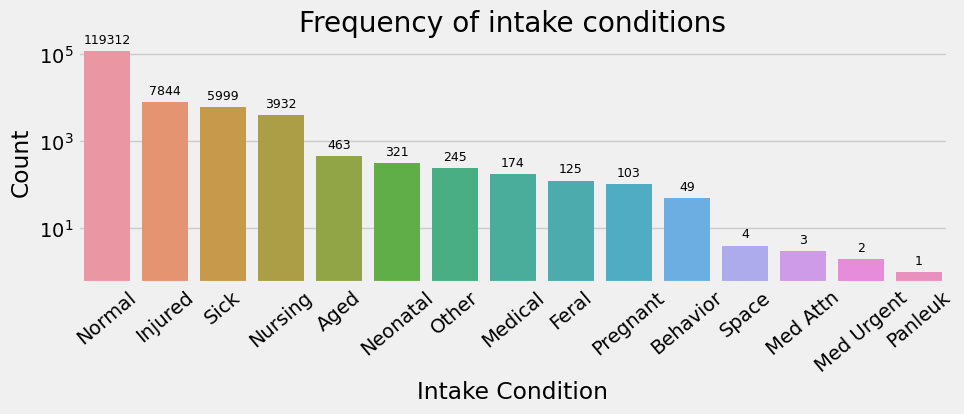

In [215]:

fig = plt.figure(figsize = (10, 3))
 
plots = sns.countplot(x="Intake Condition", data=intakes, order=intakes["Intake Condition"].value_counts().index)

plt.xticks(rotation=40)
plots.set_yscale("log")
plt.ylabel("Count")
plt.title("Frequency of intake conditions")

for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')
plt.show()


### Otázka č.2 (c): **Age upon Outcome**

Zajímá nás jak časté jsou jaké věky při adopci. Využijeme **violin** plot.

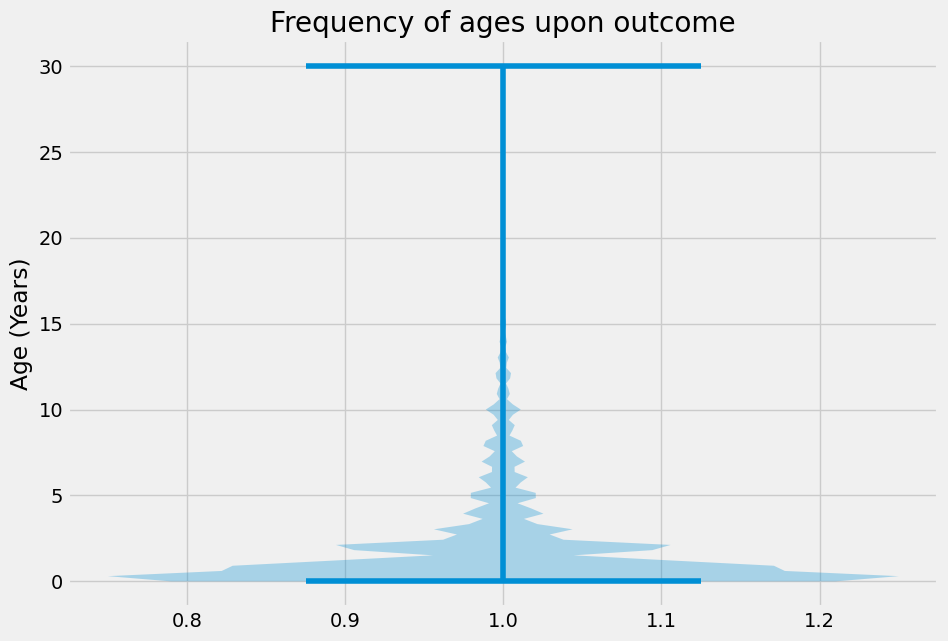

In [216]:
fig = plt.figure(figsize =(10, 7))
 
outcome_ages = outcomes["Age upon Outcome"].copy()
# Translate to years
outcome_ages = outcome_ages / 365

# Creating plot
plt.violinplot(outcome_ages, showmeans=False, showmedians=False, showextrema=True)
plt.ylabel("Age (Years)")
plt.title("Frequency of ages upon outcome")
 
# show plot
plt.show()

Můžeme vidět že na takovéto specifická data se violin plot celkem hodí. Vidíme že tu máme pár odlehlých hodnot, a těmi jsou starší zvířata. Naopak nejoblíbenější věk pro adopci je věk pod jeden rok. Nejvyší hodnota je zde 30 let.

## Vztah mezi dvoumi příznaky
### Otázka č.3 (a): **Age upon Outcome** a **Date of Birth**

Pro dvě nekategorické hodnoty se přirozeně hodí scatter plot. Tak jdeme na to. Použijeme `ticker` z knihovny `matplotlib`, které nám pomůžou s prací s **minor ticks**. A nakonec se podíváme na korelaci.

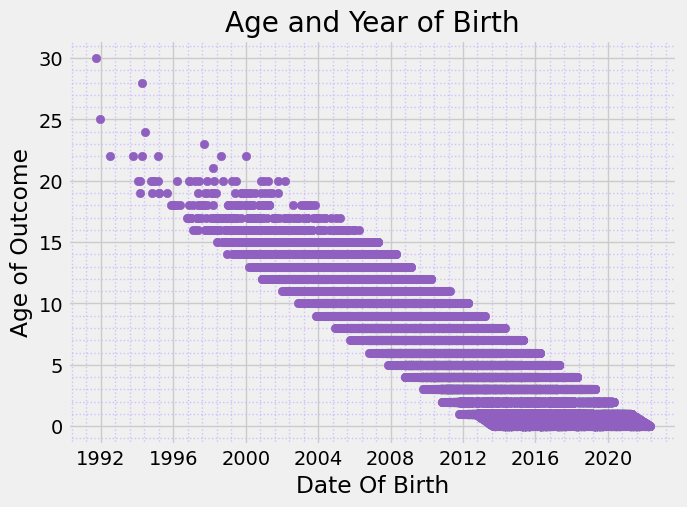

Correlation: -0.782819754708742


In [217]:
fig = plt.figure(figsize =(7, 5))
ax = fig.add_subplot(1, 1, 1)

from matplotlib.ticker import AutoMinorLocator

ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='#D0C0FC', linestyle=':')

y = outcomes["Age upon Outcome"].copy() / 365
x = outcomes["Date of Birth"].copy()
plt.scatter(x, y, color="#9060C0")

# Convert x from date to numeric value
x = x.apply(lambda x: x.value)
correlation = x.corr(y)
plt.ylabel("Age of Outcome")
plt.xlabel("Date Of Birth")
plt.title("Age and Year of Birth")
plt.show()
print(f'Correlation: {correlation:.15f}')

`Age upon Outcome` a `Date of Birth` jsou negativně korelovány. Tedy čím **dřív** se narodila, o to **výšší** mají věk, když jdou do útulku. Můžeme si všimnout, že data v datasetu jsou pouze přibližná, jelikož v grafu jsou linky a hodnoty nevypadají spojitě, to je všude, kde jsou hodnoty `Age upon Outcome` nad 1 rok. Důvodem je, že data neposkytují vyšší přesnost.

### Otázka č.3 (b): **DateTime** a **Date of Birth**

Vygrafujeme `DateTime` a `Date of Birth` z `outcomes` dataframu.

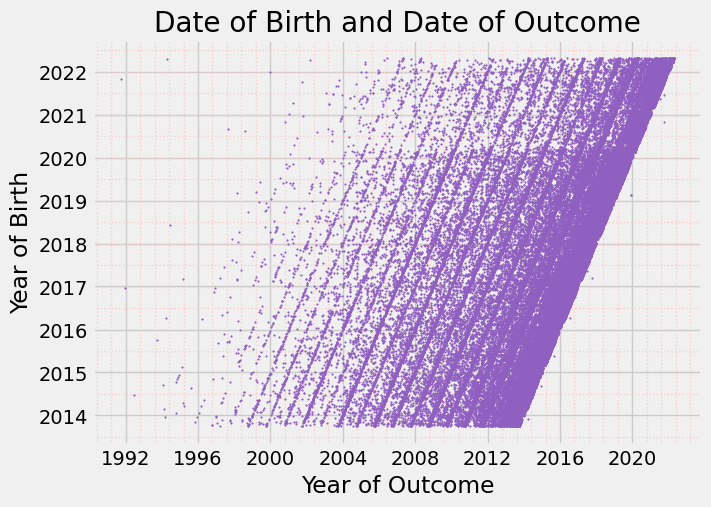

Correlation: 0.642175523205585


In [218]:
x = outcomes['Date of Birth'].apply(lambda x: pd.Timestamp(x))
y = outcomes['DateTime'].apply(lambda x: pd.Timestamp(x))
fig = plt.figure(figsize =(7, 5))
ax = fig.add_subplot(1, 1, 1)


ax.yaxis.set_minor_locator(AutoMinorLocator(2))
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.grid(which='minor', color='#FCCCCC', linestyle=':')
plt.scatter(x, y, color="#9060C0", s=1)

x = x.apply(lambda x: x.value)
y = y.apply(lambda x: x.value)
# convert datetime to numeric so we can correlate the two
correlation = y.corr(x)


plt.ylabel("Year of Birth")
plt.xlabel("Year of Outcome")
plt.title("Date of Birth and Date of Outcome")
plt.show()
print(f'Correlation: {correlation:.15f}')

Tady je korelace pozitivní, dává to smysl - čím **vyšší** má zvíře věk, tím **výšší** věk bude mít, když půjde do útulku. Data už vypadají více přirozená, to je tím, že **x** i **y** hodnoty jsou přesné minimálně na den.

# Zadané otázky
Zadání:
1) Závisí typ odchodu zvířete z útulku (Outcome Type) na typu příchodu (Intake Type)? Pokud chcete, uvažujte pro zjednodušení pouze zvířata, která se v každém datasetu vyskytují právě jednou.
2) Hraje věk zvířete roli při adopci?
3) Je příjem zvířat v rámci roku konstantní nebo existují období s větší/nižší zátěží?
## 1) **Intake Type** vs **Outcome Type**

Zde se omezíme na top 3 typy odchodu a top 3 typy příchodu, abychom zvýšili přehlednost. Na tyto data se bude hodit histogram. Začneme tím, že si spojíme data z `intakes` a `outcomes`.

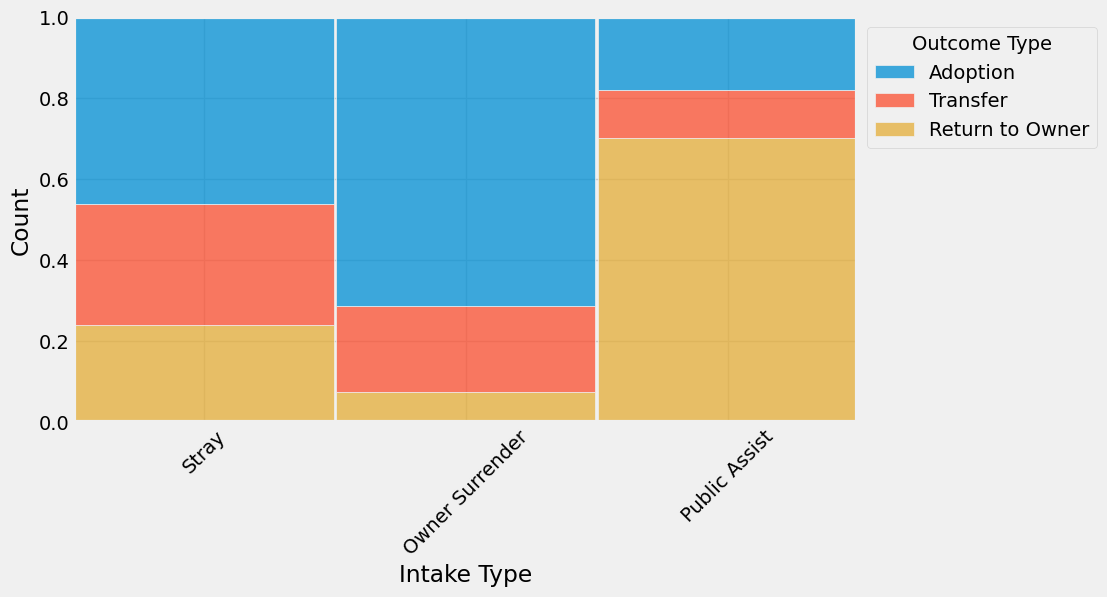

In [219]:
# Merging
intake_outcome = pd.merge(intakes, outcomes, on="Animal ID")

# Choosing most frequent 3 categories
top_three_intakes = list(intake_outcome["Intake Type"].value_counts()[:3].index)
top_threegender = list(intake_outcome["Outcome Type"].value_counts()[:3].index)

# Filter our merged data on the 3 categories
intake_outcome = intake_outcome[intake_outcome["Intake Type"].isin(top_three_intakes)]
intake_outcome = intake_outcome[intake_outcome["Outcome Type"].isin(top_threegender)]

# The data is categorical, to make seaborn recognize that we don't have all categories, we are going to alter them to be only top 3. (espelly important for displaying legend)
intake_outcome['Outcome Type'] = pd.Categorical(intake_outcome['Outcome Type'], top_threegender)
intake_outcome['Intake Type'] = pd.Categorical(intake_outcome['Intake Type'], top_three_intakes)


# Plot our data
f, ax = plt.subplots(figsize=(9, 5))
plt.xticks(rotation=45)

sns.histplot(binwidth=0.5, x="Intake Type", hue="Outcome Type", data=intake_outcome, stat="count", multiple="fill", shrink = 0.99)
            
# make the legend not cover our graph
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

Múžeme vidět, že pokud se například předchozí **vlastník zvířete vzdá**, je **vysoká šance**, že si zvíře někdo adoptuje, než například, že se vrátí zpátky k majiteli. Naopak **malou šanci** na adopci mají zvířata, která přišla se statusem **public assist**. (majitel nebo zvíře samotné je ve špatném zdravotním stavu) 

## 2) Má věk vliv na adopci?
Jedná se o adopci, tedy využijeme `outcomes` dataset. Bude nám stačit `matplotlib.plot`. Vyplníme plochu pod křivkou.


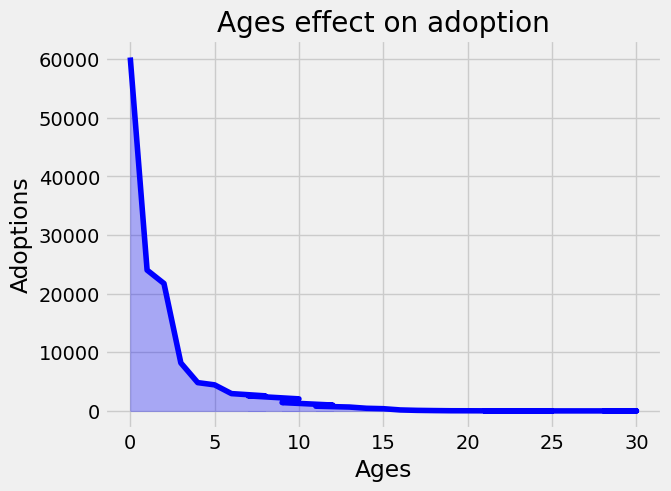

Correlation of "Age" vs "Frequency of adoption": -0.599


In [220]:
# lets simplyfy the graph (use less samples [using ints instead of floats]) 
y = (outcomes['Age upon Outcome'] / 365).astype(int).value_counts()
plt.plot(y.index, y, color="blue")
plt.fill_between(y.index, y, color='blue', alpha=0.3)

plt.title("Ages effect on adoption")
plt.xlabel("Ages")
plt.ylabel("Adoptions")
plt.show()
print(f'Correlation of "Age" vs "Frequency of adoption": {y.corr(pd.Series(y.index)):.3f}')

Ano, má negativní korelaci. Graf nám říká, že v útulku se vydává **více** zvířat s **měnším** věkem. Ta s **vyšším** věkem se vydávají **méně**. Pozor, graf neříká, že zvířata s vyšším věkem mají nižší šanci na adopci (i když to je nejspíše pravda), k tomu bychom museli uvažovat kolik zvířat s jakým věkem je již v útulku.

## 3) Je příjem zvířat v rámci roku konstantní?

Napočítáme se kolik v určitý měsíc, bez ohledu na roku, nabralo do útulku zvířat. a následně zobrazíme na grafu.

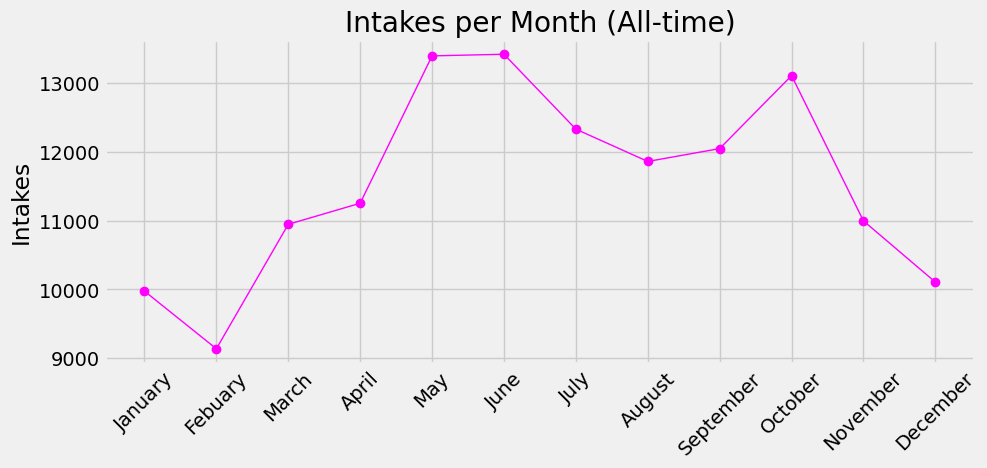

In [221]:
y = (intakes['DateTime'].dt.month).value_counts()
fig = plt.figure(figsize =(10, 4))

# we need to sort by index because we are not guaranteed that the order will be as we want it
y = y.sort_index()
months = ["January", "Febuary", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
plt.plot(months, y, "o-", color="magenta", linewidth=1)

plt.xticks(rotation=45)
# xlabel is not necessary
plt.ylabel("Intakes")
plt.title("Intakes per Month (All-time)")
plt.show()

Na konci jara a na začátku léta je celkem velký příjem zvířat. Pak je vidět, že v říjnu také přijde nezanedbatelné množství zvířat do útulku. 

# Vlastní Otázky
Zadání:

*Vymyslete **minimálně tři** vlastní otázky a odpovídejte na ně vhodnými vizualizacemi. Otázky můžete postavit na již zmíněných datasetech.*

## Otázka č. 1: Pozice nalezení na mapě
Náš úkol je, podívat se na jaké lokaci se zvířata z datasetu nalezla.

### Explorace

In [222]:
locations["Found Location"].head()

0    811 BURNSALL GATES DR78660\n(30.417121, -97.64...
1    8203 COLONY LOOP DRIVE\nAUSTIN 78724\n(30.2971...
2    1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...
3    1016 SOUTH MEADOWS DR\nAUSTIN 78758\n(30.37603...
4    AUSTIN COLONY BLVD AUSTIN 78725\n(30.242394, -...
Name: Found Location, dtype: object

Můžeme vytáhnout informaci o poloze z *(**longitude**, **latitude**)* informací v políčku. Nejdříve se koukneme jestli všechny řádky obsahují informaci o přesné pozici.

In [223]:
print("Contains longitude langitude information: ", len(locations[locations["Found Location"].str.contains('\(')] ))
print("Doesn't contain longitude langitude information: ",len(locations[~locations["Found Location"].str.contains('\(')]))

Contains longitude langitude information:  83
Doesn't contain longitude langitude information:  19


### Příprava dat

Nejdřív musíme vyčistit data na ty, která obsahují **longitude** a **latitude**. Dále vytvořit 2 instance `pd.Series`, jedna bude obsahovat **longitude** desetínné číslo a druhá **latitude** desetinné číslo. Důležité je taky podotknout, že informace jsou podány ve formátu *(**latitude**, **longitude**)* připomínající souřadnicový systém *(**y**, **x**)*

In [224]:
latitude_altitude = locations["Found Location"].copy()

# clear ones that don't include long lat position
latitude_altitude = latitude_altitude[latitude_altitude.str.contains('\(')]

# Remove the '(' ')' parenthesis
latitude_altitude = latitude_altitude.apply(lambda x: str(x).split('\n')[-1][1:-1])

# separate long and lat ... first is y then x (y, x) .. (lat, long)
lat = latitude_altitude.apply(lambda x: str(x).split(',')[0])
lng = latitude_altitude.apply(lambda x: str(x).split(',')[1].strip())

# Rename our Series
lat = lat.astype(float).rename("Latitude")
lng = lng.astype(float).rename("Longitude")

# Concatenate for ax.plot function
long_lat = pd.concat([lng, lat], axis=1)

Nalezneme minimum a maximum longitude a latitude složek souřadnic. Stanovíme *boundaries* pro náš plot. **Offset** bude informace, která nám pomáže aby žádný z bodů nebyl oříznut na okraji grafu.

In [225]:
lat_min = min(lat)
lat_max = max(lat)
long_min = min(lng)   
long_max = max(lng)
offset = 0.03
print(long_min - offset, long_max + offset, lat_min - offset, lat_max + offset)

-98.113777 -97.396419 30.129877 30.533628


Stáhneme si reprezentaci mapy v těchto částech pomocí online prostředků, já jsem využil tuto stránku https://medium.com/@abuqassim115/thanks-for-your-response-frank-fb869824ede2.
Počítáme s tím že zobrazená pozice bude přibližně odpovídat realitě.


### Zobrazení

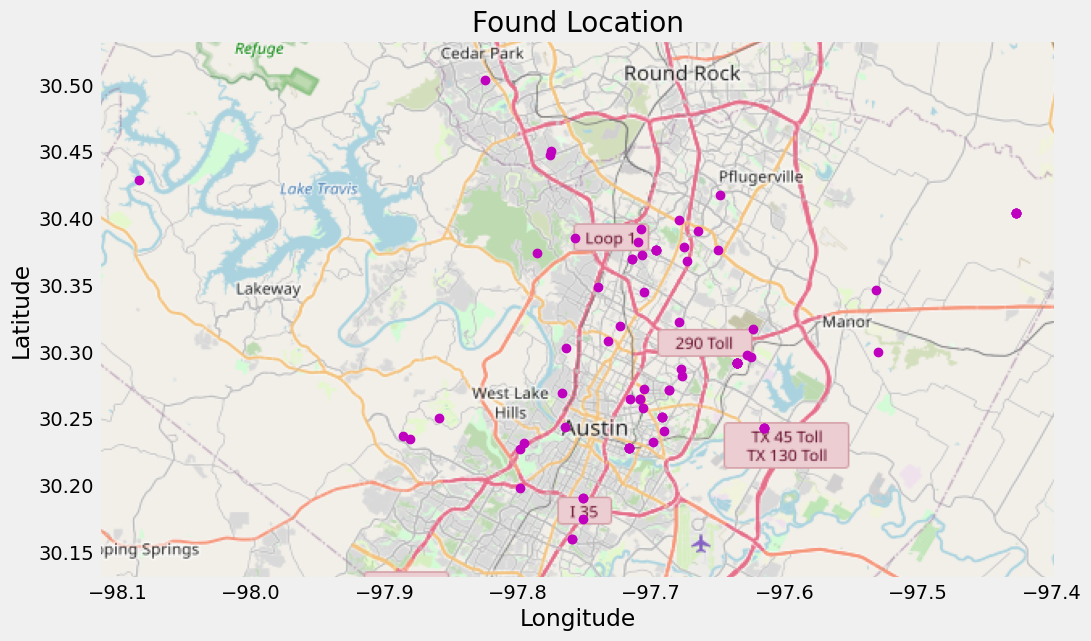

In [226]:

fig, ax = plt.subplots(figsize=(11,11))
ax.plot(long_lat["Longitude"], long_lat["Latitude"], 'om')


# Showing the image behind the points
map_img = plt.imread('map.png')
ax.imshow(map_img, zorder=0, extent=(long_min-offset, long_max + offset, lat_min-offset, lat_max + offset))

# Setting limits for the plot
ax.set_xlim(long_min-offset, long_max + offset)
ax.set_ylim(lat_min-offset, lat_max + offset)


plt.grid(False)
plt.title("Found Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

Pozorování: Nalezená zvířata se častěji vyskytují u centra města Austin.

## Otázka č. 2: Poloha koček vs psů
### Příprava dat
Využijeme práci z předchozího cvičení, tentokrát potřebujeme zachovat informaci o tom jestli je to pes nebo kočka.

In [227]:

lat_long = locations.copy()

# Keeps only necessary columns
lat_long = lat_long[["Found Location", "Type"]] # del redundant info

# Clear ones that don't include long lat position
lat_long = lat_long[lat_long["Found Location"].str.contains('\(')]

# Remove the '(' ')' parenthesis
lat_long["Found Location"] = lat_long["Found Location"].apply(lambda x: str(x).split('\n')[-1][1:-1])


lat_long["lat"] = lat_long["Found Location"].apply(lambda x: str(x).split(',')[0])
lat_long["long"] = lat_long["Found Location"].apply(lambda x: str(x).split(',')[1].strip())
lat_long["lat"] = lat_long["lat"].astype(float)
lat_long["long"] = lat_long["long"].astype(float)

# Keep only dogs
dogs = lat_long[lat_long["Type"].isin(["Dog"])].copy()
# Keep only cats
cats = lat_long[lat_long["Type"].isin(["Cat"])].copy()

### Zobrazení dat
Tentokrát kočky a psy zobrazíme odděleně.

In [228]:
fig, ax = plt.subplots(figsize=(11,11))

# Plot dogs
ax.plot(
    dogs["long"],
    dogs["lat"],
    "m",
    linestyle="",
    marker="$🐶$",
    label="Dogs",
)

# Plot cats
ax.plot(
    cats["long"],
    cats["lat"],
    "r",
    linestyle="",
    marker="$🐱$",
    label="Cats"
)

# Show background map image
ax.imshow(map_img, zorder=0, extent=(long_min-offset, long_max + offset, lat_min-offset, lat_max + offset))


plt.title("Found Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="upper left")
plt.show()

Tady krásně můžeme vidět, že psy mají tendenci být blíže u města, kde jsou lidi, a kočky se naopak nebojí jít do jiných částí.

## Otázka č. 3: Role pohlaví zvířete v adopci

### Explorace

Koukneme se jaké kategorie pohlaví tu máme.

In [229]:
list(outcomes["Sex upon Outcome"].unique())

['Neutered Male',
 'Unknown',
 'Intact Male',
 'Spayed Female',
 'Intact Female',
 nan]

Hodnoty 'Unknown' a `np.nan` se nám nelíbí. Odstraníme takové sloupce z našeho `gender` dataframu, který si vytvoříme.

In [230]:
gender = outcomes.copy()
gender = gender[~((gender["Sex upon Outcome"] == "Unknown") | (gender["Sex upon Outcome"].isnull()) )]
print("Categories:", pd.Categorical(gender['Sex upon Outcome']).unique())

Categories: ['Neutered Male', 'Intact Male', 'Spayed Female', 'Intact Female']
Categories (5, object): ['Intact Female', 'Intact Male', 'Neutered Male', 'Spayed Female', 'Unknown']


Můžeme si všimnout, že kategorické typy se nezměnily. Pokud kategorii změníme tak, aby na míru seděla datům, tak nám to pomůže ve vykreslování. Pojdme na to. 

In [231]:
gender['Sex upon Outcome'] = pd.Categorical(gender['Sex upon Outcome'], list(gender["Sex upon Outcome"].unique()))
print(pd.Categorical(gender['Sex upon Outcome']).unique())

['Neutered Male', 'Intact Male', 'Spayed Female', 'Intact Female']
Categories (4, object): ['Neutered Male', 'Intact Male', 'Spayed Female', 'Intact Female']


Super vyšlo to.

### Zobrazení

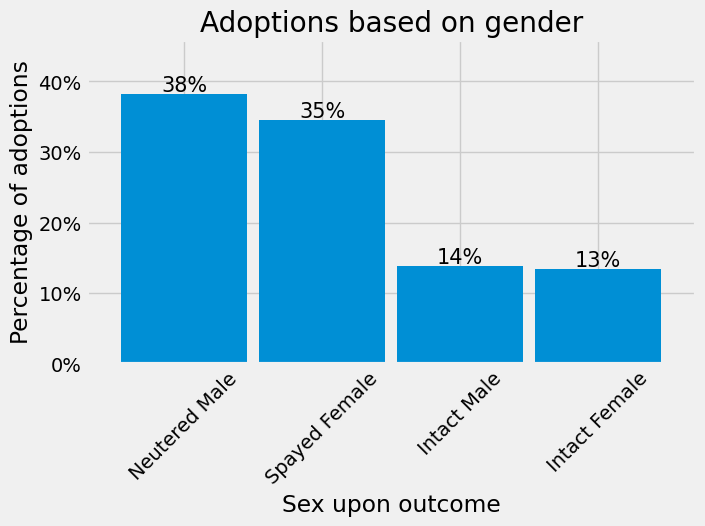

In [232]:
gender_counts = gender["Sex upon Outcome"].value_counts()
max_height = max(gender_counts.values)
val_sum = sum(gender_counts.values)


fig = plt.figure(figsize = (7, 4))
ax = gender_counts.plot(kind="bar", rot=45, width=0.91)

# Transforms y axis from numbers to percentages
import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=val_sum, decimals=0))

# Sets y ticks once per 10%
ax.set_yticks([val_sum * i*.1 for i in range(10 )])

# Limits y axis, leaves some headroom above highest bar
ax.set_ylim(0, max_height * 1.2)

# Annotate percentages above each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/val_sum:.0%}', (x + width/2, y + height+ max_height*0.01), ha='center', fontsize=15)


plt.title("Adoptions based on gender")
plt.ylabel("Percentage of adoptions")
plt.xlabel("Sex upon outcome")
plt.show()

Populární je adoptování již vykastrovaných zvířat, a trochu mají v obou nadkategoriích *(vykastrovaná, nevykastrovaná)* samci na vrch v počtu adopcí. 